# Problem Set 4

**Probability**

CHEM 114

Shimon Weiss

Due data: Friday, May 7th, 2021

---

## Problem 1

**Random Variables**

Consider tossing a fair six-sided dice. 
There are only six outcomes possible,

$$
\Omega=\lbrace 1,2,3,4,5,6 \rbrace
$$

We can characterize this measureable function (random variable) as
$X:(a) \mapsto (a)$.

Let's consider a slightly more interesting problem where we
toss two die. 
We assume that each throw is *independent*, meaning that the
outcome of one does not influence the outcome of the other. 
In this case, the sets are all pairs of possible outcomes 
from two throws as shown below,

$$
\Omega = \lbrace (1,1),(1,2),\ldots,(5,6),(6,6) \rbrace
$$

The measure of each of these sets is the 
product of the respective measures of each element.  
For instance,

$$
\mathbb{P}((1,2)) = \mathbb{P}(\lbrace 1 \rbrace) \mathbb{P}(\lbrace 2
\rbrace) = \frac{1}{6^2}
$$

### Problem 1.1

- Characterize the measurable function for the sum of the two die equal to 7.

---

### Solution 1.1

The measurable function is characterized by:

$$
X:(a,b) \mapsto (a+b)
$$

---

Next, we associate all of the $(a,b)$ pairs with their sum. 

Let's create a dictionary to achieve this.
The syntax for a python dictionary is

`dict = {key_1: value_1, key_2: value_2}`

A dictionary consists of items, where each item has 
a key and value/values that can be accessed as
`dict.items()`, `dict.keys()`, and `dict.values()`.
The keys and values of a dictionary can be strings, integerts, 
floats, tuples, etc.
A given key can have many associated values, 
as we will see later.

In order to create our dictionary, let's list all the possible 
outcomes for 2 rolls using 
[list comprehension](https://www.w3schools.com/python/python_lists_comprehension.asp).
Basically, list comprehension is a short-hand for loop
with the basic idea: `[f(x) for i in x]`,  where
`x` is an interable with elements `i`.
You are not expected to know this, so we will provide an example:

In [1]:
[i + j for i in range(1,7) for j in range(1,7)]

[2,
 3,
 4,
 5,
 6,
 7,
 3,
 4,
 5,
 6,
 7,
 8,
 4,
 5,
 6,
 7,
 8,
 9,
 5,
 6,
 7,
 8,
 9,
 10,
 6,
 7,
 8,
 9,
 10,
 11,
 7,
 8,
 9,
 10,
 11,
 12]

Now let's create use dictionary comprehension to make a 
dictionary with keys for rolls and values for the sum 
of the outcomes:

In [2]:
d = {(k,v): k + v for k in range(1,7) for v in range(1,7)}
d

{(1, 1): 2,
 (1, 2): 3,
 (1, 3): 4,
 (1, 4): 5,
 (1, 5): 6,
 (1, 6): 7,
 (2, 1): 3,
 (2, 2): 4,
 (2, 3): 5,
 (2, 4): 6,
 (2, 5): 7,
 (2, 6): 8,
 (3, 1): 4,
 (3, 2): 5,
 (3, 3): 6,
 (3, 4): 7,
 (3, 5): 8,
 (3, 6): 9,
 (4, 1): 5,
 (4, 2): 6,
 (4, 3): 7,
 (4, 4): 8,
 (4, 5): 9,
 (4, 6): 10,
 (5, 1): 6,
 (5, 2): 7,
 (5, 3): 8,
 (5, 4): 9,
 (5, 5): 10,
 (5, 6): 11,
 (6, 1): 7,
 (6, 2): 8,
 (6, 3): 9,
 (6, 4): 10,
 (6, 5): 11,
 (6, 6): 12}

Now, we will collect all of the $(a,b)$ pairs that sum to
each of the possible values from two to twelve.
We do this by inverting the dictionary we created.

In [3]:
from collections import defaultdict

d_invert = defaultdict(list)

for k,v in d.items():
    # k are dict keys and v are dict values
    d_invert[v].append(k)
    
d_invert

defaultdict(list,
            {2: [(1, 1)],
             3: [(1, 2), (2, 1)],
             4: [(1, 3), (2, 2), (3, 1)],
             5: [(1, 4), (2, 3), (3, 2), (4, 1)],
             6: [(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)],
             7: [(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)],
             8: [(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)],
             9: [(3, 6), (4, 5), (5, 4), (6, 3)],
             10: [(4, 6), (5, 5), (6, 4)],
             11: [(5, 6), (6, 5)],
             12: [(6, 6)]})

**Programming Tip.**

The `defaultdict` object from the built-in collections
module creates dictionaries with
default values when it encounters a new key.
Otherwise, we would have had to
create default values manually for a regular
dictionary.

The next step is to compute the probability measured for each of these items.
Using the independence assumption, this means we have to compute the sum of the
products of the individual item probabilities in `d_invert`. 

### Problem 1.2
- What is the probability of rolling the die with outcome 11? In other words, calculate $\mathbb{P}(11)$

---

### Solution 1.2

The probability of every term in the sum equals $1/36$,
for example:

$$
\mathbb{P}((a,b)) = \mathbb{P}(\lbrace a \rbrace) \mathbb{P}(\lbrace b
\rbrace) = \frac{1}{6^2} = \frac{1}{36}
$$

Using our dictionary, we can list all the ways to get 11:

In [4]:
d_invert[11]

[(5, 6), (6, 5)]

Thus, we have

$$
\mathbb{P}(11) = \mathbb{P}(\lbrace
(5,6) \rbrace)+ \mathbb{P}(\lbrace (6,5) \rbrace) = \frac{1}{36} +
\frac{1}{36} = \frac{2}{36}
$$

---

Now, if we want to use python to solve this, all we have to do is count the number of items in the
corresponding values for each key in `d_invert` and divide by `36`. 


Repeating this procedure for all the elements, 
we derive the probability mass
function with the following:

In [4]:
# create a dictionary with keys of outcome and values of corresponding probability
# look for a way to use only 2 decimal places

X = {k: round(len(v) / len(d), 2) for k, v in d_invert.items()}
X

{2: 0.03,
 3: 0.06,
 4: 0.08,
 5: 0.11,
 6: 0.14,
 7: 0.17,
 8: 0.14,
 9: 0.11,
 10: 0.08,
 11: 0.06,
 12: 0.03}

With this framework, we can ask other questions like
what is the probability that half the product of three dice will 
exceed the their sum? 
We can solve this using the same method as in the following. 

First, let's create the mapping:

In [ ]:
d3 = {(i, j, k): ((i * j * k) / 2 > i + j + k) 
     for i in range(1,7) 
     for j in range(1,7)  
     for k in range(1,7)}
d3

{(1, 1, 1): False,
 (1, 1, 2): False,
 (1, 1, 3): False,
 (1, 1, 4): False,
 (1, 1, 5): False,
 (1, 1, 6): False,
 (1, 2, 1): False,
 (1, 2, 2): False,
 (1, 2, 3): False,
 (1, 2, 4): False,
 (1, 2, 5): False,
 (1, 2, 6): False,
 (1, 3, 1): False,
 (1, 3, 2): False,
 (1, 3, 3): False,
 (1, 3, 4): False,
 (1, 3, 5): False,
 (1, 3, 6): False,
 (1, 4, 1): False,
 (1, 4, 2): False,
 (1, 4, 3): False,
 (1, 4, 4): False,
 (1, 4, 5): False,
 (1, 4, 6): True,
 (1, 5, 1): False,
 (1, 5, 2): False,
 (1, 5, 3): False,
 (1, 5, 4): False,
 (1, 5, 5): True,
 (1, 5, 6): True,
 (1, 6, 1): False,
 (1, 6, 2): False,
 (1, 6, 3): False,
 (1, 6, 4): True,
 (1, 6, 5): True,
 (1, 6, 6): True,
 (2, 1, 1): False,
 (2, 1, 2): False,
 (2, 1, 3): False,
 (2, 1, 4): False,
 (2, 1, 5): False,
 (2, 1, 6): False,
 (2, 2, 1): False,
 (2, 2, 2): False,
 (2, 2, 3): False,
 (2, 2, 4): False,
 (2, 2, 5): True,
 (2, 2, 6): True,
 (2, 3, 1): False,
 (2, 3, 2): False,
 (2, 3, 3): True,
 (2, 3, 4): True,
 (2, 3, 5): True,
 (2,

The keys of this dictionary are the [tuples](https://www.w3schools.com/python/python_tuples.asp)
of triples and the values 
are the [Boolean](https://www.w3schools.com/python/python_booleans.asp) 
result i.e. true or false statement for whether or not 
half of the product of three dice exceeds the sum.

### Problem 1.3

- Create an inverse dictionary called `d3_invert` that collects all the true and false values into two keys.
- what is the probability of any triple?
- create a dictionary called `X3` that collects the values for `True` and `False`
- what is the probability of half the product of three dice exceeding their sum? 
- what is the probability of half the product of three dice *not* exceeding their sum?

---

### Solution 1.3

In [ ]:
d3_invert = defaultdict(list)

for k, v in d3.items(): 
    d3_invert[v].append(k)

d3_invert

defaultdict(list,
            {False: [(1, 1, 1),
              (1, 1, 2),
              (1, 1, 3),
              (1, 1, 4),
              (1, 1, 5),
              (1, 1, 6),
              (1, 2, 1),
              (1, 2, 2),
              (1, 2, 3),
              (1, 2, 4),
              (1, 2, 5),
              (1, 2, 6),
              (1, 3, 1),
              (1, 3, 2),
              (1, 3, 3),
              (1, 3, 4),
              (1, 3, 5),
              (1, 3, 6),
              (1, 4, 1),
              (1, 4, 2),
              (1, 4, 3),
              (1, 4, 4),
              (1, 4, 5),
              (1, 5, 1),
              (1, 5, 2),
              (1, 5, 3),
              (1, 5, 4),
              (1, 6, 1),
              (1, 6, 2),
              (1, 6, 3),
              (2, 1, 1),
              (2, 1, 2),
              (2, 1, 3),
              (2, 1, 4),
              (2, 1, 5),
              (2, 1, 6),
              (2, 2, 1),
              (2, 2, 2),
              (2, 2, 3),


The probability of every combination for three die is:

$$
\mathbb{P}((a,b,c)) = \mathbb{P}(\lbrace a \rbrace) \mathbb{P}(\lbrace b
\rbrace) \mathbb{P}(\lbrace c
\rbrace) = \frac{1}{6^3} = \frac{1}{216}
$$

Finally, we collect this for each outcome as in the following,

In [ ]:
X3 = {k: round(len(v) / len(d3), 2) for k, v in d3_invert.items()}
X3

{False: 0.37, True: 0.63}

In [ ]:
# many ways to figure this out (hopefully they do not do it manually)

[print(k, len(v)) for k, v in d3_invert.items()];

False 80
True 136


The set that is induced by the random variable has only
two keys in it, `True` and `False`, with 136 elements in `True`
and 80 elements in `False`:



The probability that half of the product of the three rolls is greater
than their sum is then:

$$\mathbb{P}(\mbox{True})=\frac{136}{216}$$

and the probability otherwise is:

$$\mathbb{P}(\mbox{False})=1 - \frac{136}{216}$$

---

**The Multinomial Distribution**

The Multinomial distribution is a generalization of the Binomial distribution.
The Binomial distribution is a special case of the Multinomial distribution with $n=2$. 

The Multinomial distribution characterizes the probability distribution of $\mathbf{N}_n$.  

Consider the problem of $n$ balls to be divided among $r$ available bins
where each bin may accommodate more than one ball. 
For example, suppose $n=10$ and $r=3$, then one possible valid configuration is:

$$\mathbf{N}_{10} = [3,3,4]$$

The probability that a ball lands in the $i^{th}$ bin
is $p_i$, where $\sum p_i = 1$. 

The Multinomial distribution is implmented in the 
[`scipy.stats`](https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html) 
module as shown below,

In [5]:
from scipy.stats import multinomial
import numpy as np

n = 10
r = 3
p = 1/r

# create a random variable for the multinominal distribution
rv = multinomial(n, np.ones(r)*p)
# create distribution 4 rows and r columns 
rv.rvs(4)

array([[6, 1, 3],
       [2, 2, 6],
       [3, 2, 5],
       [4, 1, 5]])

By definition, the sum across the columns for the 
multinomial distribution is always equal to $n$:

In [6]:
rv.rvs(4).sum(axis=1)

array([10, 10, 10, 10])

In [7]:
rv.rvs(10).sum(axis=1)

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

Note that the relationship to $n$ remains unchanged
for any number of rows.

## Problem 2
**The Pigeon Hole Principle**

The pigeonhole principle appears as early as 1624, 
and states that $n$ items are put into $m$ containers, 
with $n > m$, then at least one container must contain more than one item.

![TooManyPigeons.jpg](TooManyPigeons.jpg)


Here there are n = 10 pigeons in m = 9 holes. 
Since 10 is greater than 9, the pigeonhole principle says 
that at least one hole has more than one pigeon. 

- What is the probability that the 5th hole has two pigeons
    and every other hole has one pigeon?
- If we assume that every hole has at least one pigeon, 
    what is the probability that the 5th hole has two pigeons?
    In other words, no holes can have 0 pigeons. 

---

## Solution 2

- the probability of the configuration
    $\mathbf{N}_{10} = [1, 1, 1, 1, 2, 1, 1, 1, 1]$
    is $p = 0.00052$ (calculated below)


In [8]:
n = 10
m = 9
p = 1/m

# create a random variable for the multinominal distribution
rv = multinomial(n, np.ones(m)*p)
# create distribution with rows and m columns 
rv.rvs(4)

array([[2, 1, 2, 1, 1, 1, 0, 1, 1],
       [3, 0, 1, 1, 0, 1, 3, 0, 1],
       [2, 0, 2, 0, 0, 2, 1, 1, 2],
       [1, 0, 0, 2, 1, 2, 2, 0, 2]])

In [9]:
round(rv.pmf([1, 1, 1, 1, 2, 1, 1, 1, 1]), 5)

0.00052

- $p = \frac{1}{10}$

The latter does not require python...

---

**Chi-Square Distribution**

The $\chi^2$  distribution is the sum of the squares 
of $k$ independent standard normal random variables. 
Specifically, the $\chi^2$ distribution is a special 
case of the gamma distribution.
It is frequently used for hypothesis testing and for
construction of confidence intervals.

Suppose we have $n$ independent random variables
$X_i$ such that $X_i\sim \mathcal{N}(0,1)$.  
We are interested in the following random variable 
$R = \sqrt{\sum_i X_i^2}$. 

The joint probability density of $X_i$ is:

$$
f_{\mathbf{X}}(X) = \frac{e^{-\frac{1}{2}\sum_i X_i^2}}{(2\pi)^{\frac{n}{2}}}
$$

where the $\mathbf{X}$ represents a vector of $X_i$ random variables. 
You can think of $R$ as the radius of an $n$-dimensional sphere. 
The volume of this sphere is given by the the following formula,

$$
V_n(R) = \frac{\pi^{\frac{n}{2}}}{\Gamma(\frac{n}{2}+1)} R^n
$$

To reduce the amount of notation we define,

$$
A := \frac{\pi^{\frac{n}{2}}}{\Gamma(\frac{n}{2}+1)}
$$

The differential of this volume is the following,

$$
dV_n(R)= n A R^{n-1} dR
$$

In term of the $X_i$ coordinates, the probability (as always) 
equals one.

$$
\int f_{\mathbf{X}}(\mathbf{X}) dV_n(\mathbf{X}) = 1
$$

Changing the variable in terms of $R$ gives,

$$
\int f_{\mathbf{X}}(R) n A R^{n-1} dR
$$

Now,

$$
f_R(R):=f_{\mathbf{X}}(R)  = n A
R^{n-1}\frac{e^{-\frac{1}{2}R^2}}{(2\pi)^{\frac{n}{2}}}
$$

However, we are interested in the distribution $Y=R^2$. 
Using the same technique again,

$$
\int f_{R}(R) dR =\int f_{R}(\sqrt{Y}) \frac{dY}{2\sqrt{Y}}
$$

Finally giving,

$$
f_Y(Y) := n A Y^\frac{n-1}{2}\frac{e^{-\frac{1}{2}Y}}{(2\pi)^{\frac{n}{2}}}
\frac{1}{2\sqrt{Y}}
$$

Then, the final step is to substitute back in $A$.
This gives the $\chi^2$ distribution with $n$ degrees of freedom,

$$
f_Y(Y) = n \frac{\pi^{\frac{n}{2}}}{\Gamma(\frac{n}{2}+1)}
Y^{n/2-1}\frac{e^{-\frac{1}{2}Y}}{(2\pi)^{\frac{n}{2}}} \frac{1}{2}=
\frac{2^{-\frac{n}{2}-1} n }{\Gamma \left(\frac{n}{2}+1\right)}e^{-Y/2}
Y^{\frac{n}{2}-1}
$$

## Problem 3
  
Consider the following table that tabulates the
infection status of a certain population.  

| Mild Infection | Strong Infection | No infection | Total |
|----------------|------------------|--------------|-------|
| 128            | 136              | 420          | 684   |  


**Hypothesis:** 
these data are distributed according 
to the multinomial distribution with the following 
rates for each group:
- mild infection: $p_1=1/4$ 
- strong infection: $p_2=1/4$ 
- no infection: $p_3=1/2$ 

Suppose $n_i$ is the count of people in the
$i^{th}$ column and $\sum_{i} n_i = n = 684$. 
Let $k$ denote the number of columns.
Then, in order to apply the Central Limit Theorem, 
we want to sum the $n_i$ random variables, 
but these all sum to $n$, a constant, which prohibits using
the theorem. 
Instead, suppose we sum the $n_i$ variables up to $k-1$ terms:

$$
z = \sum_{i=1}^{k-1} n_i
$$

$z$ is asymptotically normally distributed, with mean
$\mathbb{E}(z) = \sum_{i=1}^{k-1} n p_i$. 

Using our previous results and notation for
multinomial random variables, we can write this as

$$
z = [\mathbf{1}_{k-1}^\top,0]\mathbf{N}_n
$$

where $\mathbf{1}_{k-1}$ is a vector of all ones of length $k-1$ and
$\mathbf{N}_n\in \mathbb{R}^{k}$. 
With this notation, we have

$$
\mathbb{E}(z )= n [\mathbf{1}_{k-1}^\top,0] \mathbf{p} = \sum_{i=1}^{k-1} n
p_i = n(1-p_k)
$$

We can get the variance of $z$ using the same method,

$$
\mathbb{V}(z)
=[\mathbf{1}_{k-1}^\top,0]\textrm{Cov}(\mathbf{N}_n)[\mathbf{1}_{k-1}^\top,0]^\top
$$

which gives,

$$
\mathbb{V}(z)
=[\mathbf{1}_{k-1}^\top,0](n\textrm{diag}(\mathbf{p})-n\mathbf{p}\mathbf{p}^\top
)[\mathbf{1}_{k-1}^\top,0]^\top
$$

The variance is then,

$$
\mathbb{V}(z) = n (1-p_k)p_k
$$

With the mean and variance established we can subtract the
hypothesize mean for  each column under the hypothesis and create 
the transformed variable,

$$
z^\prime = \sum_{i=1}^{k-1} \frac{n_i-n p_i}{\sqrt{n (1-p_k)p_k}} \sim
\mathcal{N}(0,1)
$$

by the Central Limit Theorem. 

Likewise,

$$
\sum_{i=1}^{k-1} \frac{(n_i-n p_i)^2}{n (1-p_k)p_k} \sim \chi_{k-1}^2
$$

With all that established, we can test the hypothesis that the 
data in the table follow the hypothesized multinomial distribution
using the `scipy.stats` module:

In [10]:
from scipy.stats import chi2

- calculate $\mathbb{V}(z)$
- calculate $\chi^2_{k-1}$
- perform a $\chi^2$ test to check the validity of the hypothesis and explain your answer in 2 sentences or less
  - Hint: you will need to use the CDF distribution at the observed point

---

## Solution 3

In [ ]:
# define parameters
n = 684
p1 = p2 = 1/4
p3 = 1/2

# calculate v(z)
v = n * p3 * (1 - p3)
v

171.0

In [ ]:
# calculate z
z = (128 - n * p1)**2 / v + (136 - n * p2)**2 / v
round(z, 2)

17.98

In [ ]:
# calculate confidence interval for k-1 terms
conf_int = 1 - chi2(2).cdf(z)
round(conf_int, 5)

0.00012

The cumulative probability of $\chi^2$ being higher than observed is very low, which means that the probability of the observed data being more deivergent than the expected model is very low.
This suggests 
that the hypothesis about the data following a multinomial 
distribution is *not* good. 

---

**Poisson and Exponential Distributions**

The Poisson distribution for a random
variable $X$ represents a number of
events occurring in a given time interval
($t$).
The probability mass function (PMF) of the Poisson
distribution is,

$$
p(x;\lambda t) = \frac{e^{-\lambda t}(\lambda t)^x}{x!}
$$

The Poisson distribution is closely related to the 
binomial distribution, $b(k; n, p)$ 
where $p$ is small and $n$ is large. 
That is, when there is a low-probability event 
but many trials, $n$. 

The binomial distribution is,

$$
b(k;n,p) =\binom{n}{k} p^k (1 - p)^{n - k}
$$

for $k = 0, 1, 2, ..., n,$ and where 
$\binom {n}{k}=\frac {n!}{k!(n-k)!}$.

Evaluating for $k=0$ and taking the logarithm of both sides, we obtain

$$
\log b(0; n, p) = (1 - p)^n = \left( 1-\frac{\lambda}{n} \right)^n
$$

Then, the Taylor expansion of this gives the following,

$$
\log b(0; n, p) \approx -\lambda - \frac{\lambda^2}{2 n} - \cdots
$$

For large $n$, we can approximate this to,

$$
b(0;n,p) \approx e^{-\lambda}
$$

A similar argument for $k$ leads to the Poisson distribution.

Conveniently, we have $\mathbb{E}(X) = \mathbb{V}(X)= \lambda$. 

## Problem 4
For example, suppose that the average number of vehicles 
passing under a toll-gate per hour is 3. 
- use python to calculate the probability that 6 vehicles pass under the gate in an hour 
  > Hint: use the `poisson` method from the `scipy.stats` module 
---

## Solution 4

$$
p(x=6;\lambda t= 3) = \frac{3^6}{6! e^3}\approx 0.05
$$

The Poisson distribution is available from `scipy.stats` module.
The following code computes the last result,

In [11]:
from scipy.stats import poisson

# create a 'frozen' random variable object for the 
# poisson function where lambda*t = 3
rv = poisson(3)

# evaluate at x = 6, and print with accuracy of 2 decimal places
print(f'pmf ={rv.pmf(6): .3f}')

pmf = 0.050


---

**Exponential Distribution**

The Poisson distribution is important for applications 
involving reliability and queueing. 
The Poisson distribution is used to compute the probability of
specific numbers of events during a particular time period. 
In many cases the time period ($X$) itself is the random variable. 
For example, we might be interested in understanding the time 
$X$ between arrivals of vehicles at a checkpoint. 
With the Poisson distribution, the probability of *no* events
occurring in the span of time up to time $t$ is given by the following,

$$
p(0;\lambda t) = e^{-\lambda t}
$$

Now, suppose $X$ is the time to the first event. 
The probability that the length of time until the first event 
will exceed $x$ is given by the following,

$$
\mathbb{P}(X>x) = e^{-\lambda x}
$$

Then, the cumulative distribution function (CDF) is given by 
the following,

$$
\mathbb{P}(0\le X\le x) = F_X (x) = 1-e^{- \lambda x}
$$

Taking the derivative of the CDF gives the *exponential* distribution,

$$
f_X(x) = \lambda e^{-\lambda x}
$$

where $\mathbb{E}(X) = 1/\lambda $ and $\mathbb{V}(X)=\frac{1}{\lambda^2}$.

## Problem 5

- Use python to calculate the probability of a certain component lasting beyond 
    $T = 10$ years, where $T$ is modeled as a an exponential random variable 
    with $1/\lambda=5$ years

The exponential distribution is available in the `scipy.stats` module.  
Note that the parameters are described in slightly different terms, 
see the 
[documentation](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.expon.html#scipy.stats.expon) 
for `expon`.

---

## Solution 5

In order to calculate the probability for lasting more 
than 10 years we use the CDF:

$$
1-F_X(10) = e^{-2} \approx 0.14
$$

In [12]:
from scipy.stats import expon

# create 'frozen' random variable object for the 
# exponential distribution
rv = expon(loc = 0, scale = 5) 

# calculate 1 - CDF and print value to 2 decimal places
print(f'probability of lasting more than ten years is{1 - rv.cdf(10): .2f}')

probability of lasting more than ten years is 0.14


---

**Gamma Distribution**

We have previously discussed how the exponential 
distribution can be created from the Poisson events. 
The exponential distribution has the *memoryless* property, 
namely,

$$
\mathbb{P}(T>t_0+t\vert T>t_0) = \mathbb{P}(T>t)
$$

For example, given $T$ as the random variable representing 
the time until failure, this means that a component that 
has survived up through $t_0$ has the same failure probability 
of lasting $t$ units beyond that point. 
To derive this result, it is easier to compute the complementary 
event,

$$
\mathbb{P}(t_0<T<t_0+t\vert T>t_0) = \mathbb{P}(t_0<T<t_0+t) = e^{-\lambda
t} \left(e^{\lambda  t}-1\right)
$$

Then, one minus this result shows the memoryless property, which,
unrealistically, does not account for wear over the first $t$ hours. 
The *gamma* distribution can remedy this.

Recall that the exponential distribution describes the time until 
the occurrence of a Poisson event, the random variable $X$ 
for the time until a specified number of Poisson events ($\alpha$) is
described by the *gamma* distribution. 
Thus, the exponential distribution is a special 
case of the gamma distribution when $\alpha=1$ and $\beta=1/\lambda$.
For $x>0$, the gamma distribution is the following,

$$
f(x;\alpha,\beta)=
\frac{\beta ^{-\alpha } x^{\alpha
   -1}
e^{-\frac{x}{\beta
   }}}{\Gamma (\alpha )}
$$

and $f(x;\alpha,\beta)=0$ when $x\le 0$ and $\Gamma$ is the gamma
function. 

The gamma distribution has $\mathbb{E}(X) = \alpha\beta $ and
$\mathbb{V}(X)=\alpha\beta^2$

---

## Problem 6

Suppose that vehicles passing under a gate follow a
Poisson process, with an average of 5 vehicles passing 
per hour. 
- Use python to calculate the probability that at most an hour will 
    have passed before 2 vehicles pass the gate

The gamma distribution is available in the `scipy.stats` module.  
Note that the parameters are described in slightly different terms, 
see the 
[documentation](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.gamma.html#scipy.stats.gamma) 
for `gamma`.

---

## Solution 6

If $X$ is time in hours that transpires before the 2 vehicles pass, 
then we have $\beta=1/5$ and $\alpha=2$. 

The required probability $\mathbb{P}(X<1) \approx 0.96 $.

We can easily calculate this using the `gamma` function:


In [13]:
from scipy.stats import gamma

# define parameters
alpha = 2
beta = 1/5

# create 'frozen' random variable object for the 
# gamma distribution
rv = gamma(a = alpha, scale = beta) 
print(f'probability of at least an hour having passed before two cars cross the point is{rv.cdf(1): .2f}')

probability of at least an hour having passed before two cars cross the point is 0.96


---

**Beta Distribution**

The uniform distribution assigns a single constant value over 
the unit interval. 
The Beta distribution generalizes this to a function over the 
unit interval. 
The probability density function of the Beta distribution 
is the following,

$$
f(x) = \frac{1}{\beta(a,b)} x^{a-1} (1-x)^{b-1}
$$

where

$$
\beta(a, b) = \int_0^1 x^{a-1} (1-x)^{b-1} dx
$$

Note that $a=b=1$ yields the uniform distribution. 
In the special case for integers where $0\le k\le n$, 
we have

$$
\int_0^1 \binom{n}{k}x^k (1-x)^{n-k} dx = \frac{1}{n+1}
$$

To get this result without calculus, we can use an experiment by
Thomas Bayes.

Start with $n$ white balls and one gray ball. 
Uniformly and at random, toss them onto the unit interval. 
Let $X$ be the number of white balls to the left of the gray ball. 
Thus, $X\in \lbrace 0,1,\ldots,n \rbrace$. 
To compute $\mathbb{P}(X=k)$, we condition on the probability 
of the position $B$ of the gray ball, which is uniformly distributed 
over the unit interval ($f(p)=1$).
Thus, we have

$$
\mathbb{P}(X=k) = \int_0^1 \mathbb{P}(X=k\vert B=p) f(p) dp = \int_0^1
\binom{n}{k}p^k (1-p)^{n-k} dp
$$

Now, consider a slight variation on the experiment where we start
with $n+1$ white balls and again toss them onto the unit interval 
and then later choose one ball at random to color gray. 
Using the same $X$ as before, by symmetry, because any one of the 
$n+1$ balls is equally likely to be chosen, we have

$$
\mathbb{P}(X=k)=\frac{1}{n+1}
$$

for $k\in \lbrace 0,1,\ldots,n \rbrace$. 

Both situations describe the same problem because it does not matter 
whether we paint the ball before or after we throw it. 
Setting the last two equations equal gives the desired result without
using calculus.

$$
\int_0^1 \binom{n}{k}p^k (1-p)^{n-k} dp =  \frac{1}{n+1}
$$

Given this experiment, it is not too surprising that there is an intimate
relationship between the Beta distribution and binomial random variables.

## Problem 7

As you have seen so far, calculating these things in python is much 
easier than the formalisms would suggest. 
In the next few problems, we will use python to explore the beta distribution. 

### Problem 7.1

- create a distribution for $\beta(3,2)$ using the `scipy.stats` module
- create an array of random variables associated with this distribution with 
    $n = 50$
- calculate the mean 
- calculate the standard deviation 
- plot a normalized histogram of the distribution using the 
    `matplotlib.pyplot` module 
    - on the same plot, plot the PDF

---
### Solution 7.1


In [35]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

%matplotlib inline

In [36]:
# define parameters 
a = 3
b = 2

# create 'frozen' random variable object for the 
# gamma distribution
rv = beta(a, b)

In [37]:
beta_rvs = rv.rvs(50)
beta_rvs.shape

(50,)

In [39]:
mean = beta.stats(a, b, moments='m')
print(f'mean = {mean}')

mean = 0.6


In [42]:
stdv = beta.std(a, b)
print(f'standard deviation = {stdv}')

standard deviation = 0.2


In [48]:
x = np.linspace(0,1,50)

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [47]:
pdf = rv.pdf(x)
pdf

array([0.        , 0.00489592, 0.01917568, 0.0422273 , 0.07343879,
       0.11219815, 0.15789339, 0.20991254, 0.26764358, 0.33047455,
       0.39779344, 0.46898826, 0.54344703, 0.62055776, 0.69970845,
       0.78028713, 0.86168178, 0.94328044, 1.0244711 , 1.10464177,
       1.18318048, 1.25947522, 1.33291401, 1.40288485, 1.46877577,
       1.52997476, 1.58586983, 1.63584901, 1.67930029, 1.71561169,
       1.74417122, 1.76436689, 1.7755867 , 1.77721868, 1.76865082,
       1.74927114, 1.71846765, 1.67562835, 1.62014127, 1.5513944 ,
       1.46877577, 1.37167337, 1.25947522, 1.13156933, 0.98734371,
       0.82618637, 0.64748532, 0.45062856, 0.23500412, 0.        ])

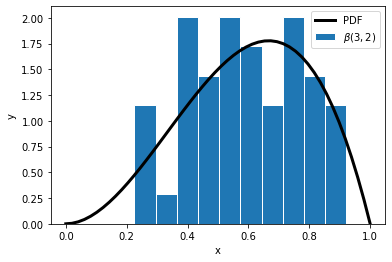

In [49]:
plt.hist(beta_rvs, density=True, edgecolor='white', label=r'$\beta(3, 2)$')
plt.plot(x, pdf, color = 'k', linewidth = 3, label='PDF')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

---

### Problem 7.2

- calculate the mean and variance of the beta distribution for `a = 2.3` and `b = 0.7`
    - print these values clearly with 2 significant figures
- create an 1D array of length 100 of beta distributed random variables
- plot the PDF of the beta distribution using the `matplotlib.pyplot` module 


---

### Solution 7.2

In [50]:
a, b = 2.3, 0.7

mean, var = beta.stats(a, b, moments='mv')
print(f'mean = {mean: .2f}, variance = {var: .2f}')

mean =  0.77, variance =  0.04


In [51]:
x = np.linspace(0, 1, 100)
x.shape

(100,)

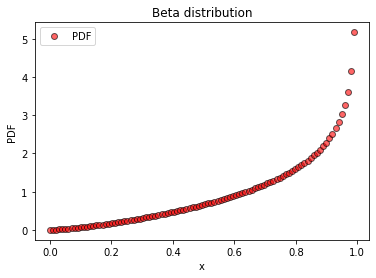

In [52]:
plt.plot(x, beta.pdf(x, a, b), 'ro', markeredgecolor='k', lw=5, alpha=0.6, label='PDF')
plt.title('Beta distribution')
plt.ylabel('PDF')
plt.xlabel('x')
plt.legend();


---